In [1]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import functools
from matplotlib.animation import FuncAnimation

"""
Dummy Data for Linear Regression
"""
data = [(1, 1), (2, 2), (3, 4), (4, 3), (5, 5.5), (6, 8), (7, 6), (8, 8.4), (9, 10), (5, 4)]    

"""
Plot the line using theta_values
"""
def plot_line(formula, x_range):
    x = np.array(x_range)  
    y = formula(x)
    plt.plot(x, y)

"""
Hypothesis Function
"""
def h(x, theta_0, theta_1):
    return theta_0 + theta_1 * x

"""
Partial Derivative w.r.t. theta_1
"""
def j_prime_theta_1(data, theta_0, theta_1):
    result = 0
    m = len(data)
    for x, y in data :
        result += (h(x, theta_0, theta_1) - y) * x
    
    return (1/m) * result

"""
Partial Derivative w.r.t. theta_0
"""
def j_prime_theta_0(data, theta_0, theta_1):
    result = 0
    m = len(data)
    for x, y in data :
        result += (h(x, theta_0, theta_1) - y)
    return (1/m) * result

"""
Cost Function
"""
def j(data, theta_0, theta_1):
    cost = 0
    m = len(data)
    for x, y in data:
        cost += math.pow(h(x, theta_0, theta_1) - y, 2)
    return (1/(2*m)) * cost

"""
Simultaneous Update
"""
def update_theta(data, alpha, theta_0, theta_1):
    temp_0 = theta_0 - alpha * j_prime_theta_0(data, theta_0, theta_1)
    temp_1 = theta_1 - alpha * j_prime_theta_1(data, theta_0, theta_1)
    theta_0 = temp_0
    theta_1 = temp_1
    return theta_0, theta_1
    
"""
Gradient Descent For Linear Regression
"""
def gradient_descent(data, alpha, tolerance, theta_0=None, theta_1=None):
    if not theta_0:
        theta_0 = random.random() * 100
    if not theta_1:
        theta_1 = random.random() * 100
    prev_j = 10000
    curr_j = j(data, theta_0, theta_1)
    theta_0_history = []
    theta_1_history = []
    cost_history = []
    while(abs(curr_j - prev_j) > tolerance):
        try:
            cost_history.append(curr_j)
            theta_0_history.append(theta_0)
            theta_1_history.append(theta_1)
            theta_0, theta_1 = update_theta(data, alpha, theta_0, theta_1)
            prev_j = curr_j
            curr_j = j(data, theta_0, theta_1)
        except:
            break
    print("Stopped with Error at %.5f" % prev_j)
    return theta_0, theta_1, cost_history, theta_0_history, theta_1_history

theta_0, theta_1, cost_history, theta_0_history, theta_1_history = gradient_descent(data, 0.001, 0.00001)

Stopped with Error at 0.46426


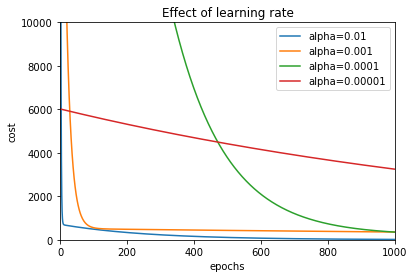

In [109]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1000)
ax.set_ylim(0, 10000)
b,=plt.plot(range(len(cost_history_01)), cost_history_01, label='alpha=0.01')
c,=plt.plot(range(len(cost_history_001)), cost_history_001, label='alpha=0.001')
d,=plt.plot(range(len(cost_history_0001)), cost_history_0001, label='alpha=0.0001')
e,=plt.plot(range(len(cost_history_00001)), cost_history_00001 ,label='alpha=0.00001')
plt.legend(handles=[b, c, d, e])
plt.title("Effect of learning rate")
ax.set_xlabel('epochs')
ax.set_ylabel('cost')
plt.show()

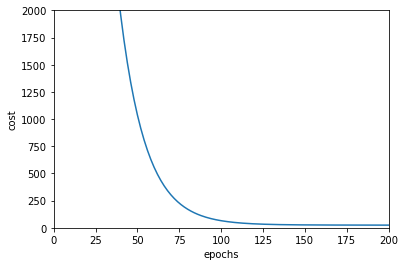

In [8]:
fig, ax = plt.subplots()
ax.set_xlim(0, 200)
ax.set_ylim(0, 2000)
plt.plot(range(len(cost_history)), cost_history)
# plt.title("Optimum learning rate")
ax.set_xlabel('epochs')
ax.set_ylabel('cost')
plt.show()

In [ ]:
f = functools.partial(h, theta_0=theta_0, theta_1=theta_1)
plt.scatter([i[0] for i in data], [i[1] for i in data])
plot_line(f, range(1,10))

In [ ]:
plt.show()

In [116]:
from IPython.core.display import display, HTML
fig, ax = plt.subplots()
x = []
y = []
plt.scatter([i[0] for i in data], [i[1] for i in data])
ln, = plt.plot(x, y, 'r--', animated=True, label='h(x)')
plt.title('Parameter Optimization for Linear Regression')

def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.legend(handles=[ln])
    return ln,

def update(frame):
    theta_0 = frame[0]
    theta_1 = frame[1]
    x = np.array(range(10))
    f = functools.partial(h, theta_0=theta_0, theta_1=theta_1)
    y = f(x)
    ln.set_data(x, y)
    return ln,

def data_gen():
    for i, j in zip(theta_0_history[::50], theta_1_history[::50]):
        yield i, j

ani = FuncAnimation(fig, update, frames=data_gen(),
                    init_func=init, blit=False, interval=100)
display(HTML(ani.to_html5_video()))

In [58]:
from IPython.core.display import display, HTML
fig, ax = plt.subplots()
x = []
y = []
plt.scatter([i[0] for i in data], [i[1] for i in data])
ln, = plt.plot(x, y, 'r--', animated=True)
plt.title('Hypothesis Parameter Optimization for Linear Regression')

def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    return ln,

def update(frame):
    theta_0 = frame[0]
    theta_1 = frame[1]
    x = np.array(range(10))
    f = functools.partial(h, theta_0=theta_0, theta_1=theta_1)
    y = f(x)
    ln.set_data(x, y)
    return ln,

def data_gen():
    for i, j in zip(theta_0_history[::300], theta_1_history[::300]):
        yield i, j

ani = FuncAnimation(fig, update, frames=data_gen(),
                    init_func=init, blit=False, interval=100)
display(HTML(ani.to_html5_video()))

99

In [22]:
plt.show()